In [1]:
# Let's import all the required libraries
import numpy as np
import seaborn as sns
import matplotlib as mat
import pandas as pd

# We are using scikit learn library for the model
from sklearn.preprocessing import StandardScaler # To scale the data for the model
from sklearn.cluster import KMeans # This is the model we are building - KMeans


In [2]:
# KMeans clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping clusters.
# It operates by identifying centroids, one for each cluster, and assigning data points to the nearest cluster while minimizing the within-cluster sum of squares.
d = pd.read_csv('/content/drive/MyDrive/Cust_Spend_Data.csv')
d.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [3]:
# In this model, we will not be spliting the data for training and testing. This model, in simple terms, used to predict class or category that certain data should be put in.
# We have no need of identifiable information for the training of this model. We will be removing such information.
# Since, after removal of identifible columns, all the data is numerical so, we do not have to encode the data.
dropped_data = d.drop(['Cust_ID', 'Name'], axis = 1)

In [4]:
# We will have to scale the data. It ensures that all features contribute equally to the distance calculations, preventing features with larger scales
# from dominating the clustering process and leading to more accurate and reliable results.
sc = StandardScaler()
scaled_d = sc.fit_transform(dropped_data)
scaled_d

array([[ 1.88649751, -1.24034735,  1.52752523, -0.74143264, -1.38013112],
       [ 0.78756692, -0.62017367, -0.65465367,  1.28065638,  1.7251639 ],
       [ 0.78756692,  1.86052102,  1.52752523, -0.29207953,  0.        ],
       [ 0.60441182,  0.62017367,  1.52752523, -0.74143264,  0.        ],
       [ 0.42125673,  1.24034735, -0.65465367,  1.7300095 , -0.34503278],
       [-0.31136367, -0.62017367, -0.65465367, -0.74143264,  1.38013112],
       [-0.86082896,  0.62017367, -0.65465367,  1.50533294, -0.69006556],
       [-0.86082896, -0.62017367, -0.65465367, -0.74143264, -1.03509834],
       [-1.04398406, -1.24034735, -0.65465367, -0.51675608, -0.69006556],
       [-1.41029426,  0.        , -0.65465367, -0.74143264,  1.03509834]])

In [5]:
scaled_d_df = pd.DataFrame(scaled_d, columns = sc.get_feature_names_out())
scaled_d_df

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [6]:
'''class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='auto',
 max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')'''

# Here we need to decide a number for n_cluster and it is used to generete that many centroids and clusters. In order to decide it, we will loop the model to run multiple times and
# with that we will use a heuristic method (the Elbow Method) to determine the optimal number of clusters for a clustering algorithm. It involves plotting the WCSS for
# range of k values and looking for an “elbow” point on the graph. The idea is that the point where the rate of decrease in WCSS sharply changes
# (forming an elbow-like shape) is a good choice for the number of clusters.
# WCSS is the sum of the variance between the observations in each cluster.

inertia = []
for i in range(2,8):
  model = KMeans(n_clusters=i, init='k-means++', random_state=50, n_init='auto')
  model.fit(scaled_d_df)
  inertia.append(model.inertia_)


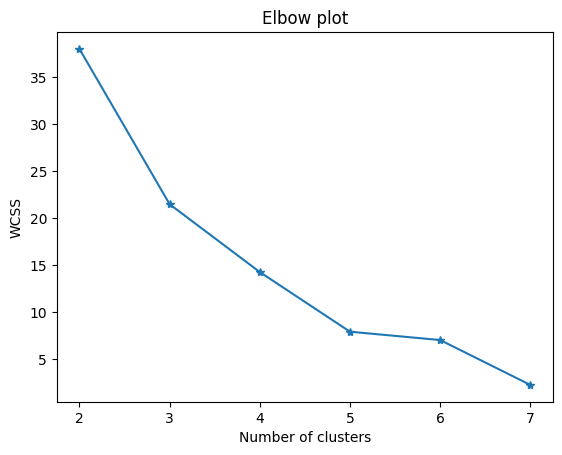

In [9]:
mat.pyplot.plot(range(2,8), inertia, marker = '*')
mat.pyplot.xlabel("Number of clusters")
mat.pyplot.ylabel("WCSS")
mat.pyplot.title("Elbow plot")
mat.pyplot.show()

In [10]:
# Remember that fit is used when you plan to fit a model that you'll use to make predictions on new data later.
# while fit_predict is for when you want to fit to the data and also get cluster assignments immediately, without the need for predicting on new data later.
# As this time we care creating a final model, we will be using fit_predict for the model, earlier we used fit to run the model.

final_model = KMeans(n_clusters=5, init='k-means++', random_state=50, n_init='auto')
op_cluster = pd.DataFrame(final_model.fit_predict(scaled_d_df))

# We will now merge the cluster data with the data we initially took and we can also add identifiable information now (if you wish to).

dropped_data['Cluster'] = op_cluster
dropped_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster
0,10000,2,1,1,0,4
1,7000,3,0,10,9,2
2,7000,7,1,3,4,1
3,6500,5,1,1,4,1
4,6000,6,0,12,3,0
5,4000,3,0,1,8,2
6,2500,5,0,11,2,0
7,2500,3,0,1,1,3
8,2000,2,0,2,2,3
9,1000,4,0,1,7,2


In [11]:
# This is just arranging the data frame with respect to cluster.
final_data = pd.DataFrame(dropped_data.groupby("Cluster").mean())
final_data = final_data.sort_values(by = "Avg_Mthly_Spend", ascending=False)
final_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
Cluster,,,,,
4,10000.0,2.000000,1.0,1.0,0.0
1,6750.0,6.000000,1.0,2.0,4.0
0,4250.0,5.500000,0.0,11.5,2.5
2,4000.0,3.333333,0.0,4.0,8.0
3,2250.0,2.500000,0.0,1.5,1.5


In [12]:
# Here we are maping the cluster data with our own choice of words or based on business requirement.
dropped_data["Customer_level"] = dropped_data["Cluster"].map({4:'Level 1', 1:'Level 2', 0:'Level 3', 2:'Level 4', 3:'Level 5'})
dropped_data

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster,Customer_level
0,10000,2,1,1,0,4,Level 1
1,7000,3,0,10,9,2,Level 4
2,7000,7,1,3,4,1,Level 2
3,6500,5,1,1,4,1,Level 2
4,6000,6,0,12,3,0,Level 3
5,4000,3,0,1,8,2,Level 4
6,2500,5,0,11,2,0,Level 3
7,2500,3,0,1,1,3,Level 5
8,2000,2,0,2,2,3,Level 5
9,1000,4,0,1,7,2,Level 4


In [13]:
# Now we can use this model to find the class or level of any particular customer, all we need to do is to give this model new data in similar format and columns and before passing the data into
# the model, we will have to use '.transform' to scale the data for the model.